## 1. Hard Margin
 

Mục tiêu chính của SVM là tìm một siêu phẳng (hyperplane) trong không gian đặc trưng (feature space) để phân tách các lớp dữ liệu khác nhau một cách rõ ràng. SVM cố gắng tối ưu hóa khoảng cách giữa các điểm dữ liệu của các lớp khác nhau và siêu phẳng này.  

![](img/SVM_margin.png)

Trong bài toán hard margin, tất cả các điểm dữ liệu phải phân tách tuyến tính (linearly separable) được, nghĩa là tìm được siêu phẳng phân tách 2 class.  

### Xây dựng bài toán

Khoảng cách từ 1 điểm tới siêu phẳng: 
$$
\frac{y_i (\mathbf{w}^T \mathbf{x}_i + b)}{||\mathbf{w}||_2}
$$

Lề:
$$
\text{margin} = \min_i \frac{y_i (\mathbf{w}^T \mathbf{x}_i + b)}{||\mathbf{w}||_2}
$$

Bài toán là tìm hệ số $\mathbf{w}, b$ để tối đa hóa lề (margin):
$$
\begin{align*}
(\mathbf{w}, b) &= \arg \max_{\mathbf{w}, b} \left( \min_i \frac{y_i (\mathbf{w}^T \mathbf{x}_i + b)}{||\mathbf{w}||_2} \right) \\
                &= \arg \max_{\mathbf{w}, b} \left( \frac{1}{||\mathbf{w}||_2} \min_i y_i (\mathbf{w}^T \mathbf{x}_i + b) \right)
\end{align*}
$$

Gọi $x_0$ là điểm gần siêu phẳng nhất $\Rightarrow$ margin đạt min. Ta có:
$$
\begin{align*}
y_0 (\mathbf{w}^T \mathbf{x}_0 + b) &= a \\
\Rightarrow \frac{y_0 (\mathbf{w}^T \mathbf{x}_0 + b)}{a} &= \frac{1}{a} \\
\Rightarrow y_0 (\mathbf{w}^T \mathbf{x}_0 + b) &= 1
\end{align*}
$$

Từ đó ta có điều kiện: $\forall \mathbf{x}_i$ thì $y_i (\mathbf{w}^T \mathbf{x}_i + b) \ge 1$  
Vậy bài toán trở thành: 
$$
(\mathbf{w}, b) = \arg \max_{\mathbf{w}, b} \frac{1}{||\mathbf{w}||_2}
$$

Có thể viết lại thành 
$$
(\mathbf{w}, b) = \arg \min_{w, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

s.t
$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \ge 1 \quad \forall i
$$

### Lagrangian của bài toán SVM

$$
\mathcal{L}(\mathbf{w}, b, \lambda) = \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^{n} \lambda_i \left[ y_i (\mathbf{w}^T \cdot \mathbf{x}_i + b) - 1 \right]
$$

Trong đó:

- $\lambda_i \geq 0$ là các bội Lagrange tương ứng với các ràng buộc $y_i (\mathbf{w}^T \cdot \mathbf{x}_i + b) \geq 1$.

### CM thỏa mãn điều kiện Slater
- Vì tập dữ liệu là tuyến tính, nên tồn tại $\mathbf{w}_0, b_0$ là nghiệm của bài toán.

$$
\begin{align*}
\Rightarrow 1 - y_i (\mathbf{w}_0 ^T \mathbf{x}_i + b_0) &\le 0 \\
\Rightarrow 2 - y_i (2 \mathbf{w}_0 ^T \mathbf{x}_i + 2b_0) &\le 0 \\
\Rightarrow 1 - y_i (2 \mathbf{w}_0 ^T \mathbf{x}_i + 2b_0) &\le -1 < 0
\end{align*}
$$

$\Rightarrow$ chọn $\mathbf{w} = 2 \mathbf{w}_0, b = 2b_0$  $\Rightarrow$ định lý Slater thỏa mãn $\Rightarrow$ nghiệm của bài toán thỏa mã điều kiện KKT

### Điều kiện KKT

**Điều kiện dừng**:  
   $$ \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 0 \Rightarrow \mathbf{w} = \sum_{i=1}^{n} \lambda_i y_i \mathbf{x}_i $$
   $$ \frac{\partial \mathcal{L}}{\partial b} = 0 \Rightarrow \sum_{i=1}^{n} \lambda_i y_i = 0 $$

**Điều kiện bổ sung**:  
   $$ \lambda_i \left[ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) - 1 \right] = 0 $$

**Điều kiện khả thi**:  
   $$ y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \lambda_i \geq 0 $$

## Bài toán đối ngẫu
$$ g(\lambda) = \min_{\mathbf{w}, b} \mathcal{L}(\mathbf{w}, b, \lambda) $$

Thay $\mathbf{w}$ tính được ở bên trên vào $\mathcal{L}(\mathbf{w}, b, \lambda)$ thu được:
$$
\begin{align*}
g(\lambda) &= \frac{1}{2} \left( \sum_{i=1}^{n} \lambda_i y_i \mathbf{x}_i \right) \cdot \left( \sum_{j=1}^{n} \lambda_j y_j \mathbf{x}_j \right) - \sum_{i=1}^{n} \lambda_i \left[ y_i \left( \sum_{j=1}^{n} \lambda_j y_j (\mathbf{x}_i^T \cdot \mathbf{x}_j) + b \right) - 1 \right] \\
            &= \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j (\mathbf{x}_i^T \cdot \mathbf{x}_j)
\end{align*}
$$

Đặt $\mathbf{V} = [y_1 \mathbf{x}_1, \ldots, y_n \mathbf{x}_n]$, $\mathbf{K} = \mathbf{V}^T \mathbf{V}$  
Khi đó:
$$
g(\lambda) = \mathbf{1}^T \mathbf{\lambda} - \frac{1}{2} \mathbf{\lambda}^T \mathbf{K} \mathbf{\lambda}
$$

Ta có bài toán đối ngẫu:
$$
\mathbf{\lambda} = \arg \max_{\mathbf{\lambda}} g(\mathbf{\lambda})
$$

s.t.
$$
\lambda_i \ge 0
$$

$$
\sum_{i=1}^{n} \lambda_i y_i = 0
$$

Đây là bài toán lồi và thuộc dạng quadratic programming (bậc 2). 

## Nghiệm của bài toán gốc
$ \mathbf{w} = \sum_{i \in S} \lambda_i y_i \mathbf{x}_i $. Thực tế chỉ cần chọn $\lambda_i$ thực sự lớn hơn 0, tránh tính toán phức tạp.  
$b = \frac{1}{|S|} \sum_{i \in S} \left( y_i - w^T x_i \right)$  
$S$ là tập hợp các điểm dữ liệu có $\lambda$ thực sự khác 0

In [44]:
import numpy as np
import matplotlib.pyplot as plt 

means = [[2, 2], [4.5, 2]]
cov = [[.3, .2], [.2, .3]]

N = 100

X1 = np.random.multivariate_normal(mean=means[0], cov=cov, size=N)
X2 = np.random.multivariate_normal(mean=means[1], cov=cov, size=N)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((np.ones(shape=(1, N)), np.full(shape=(1, N), fill_value=-1)), axis=1)

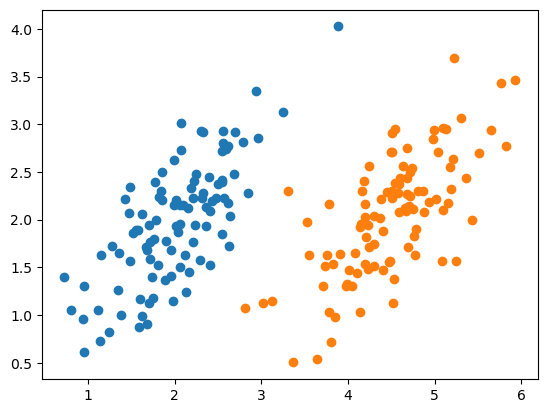

In [39]:
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])

In [45]:
from cvxopt import matrix, solvers

# V = [y1x1, y2x2,..., ynxn], K = V^T.V
V = np.concatenate((X1.T, - X2.T), axis=1)
K = matrix(V.T.dot(V))

q = matrix(-np.ones((2*N, 1)))

# Điều kiện thứ 1
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))

# Điều kiện thứ 2
A = matrix(y)
b = matrix(np.zeros((1, 1))) 

solvers.options['show_progress'] = False
sol = solvers.qp(K, q, G, h, A, b)

lamda = np.array(sol['x'])


In [47]:
w

array([[-6.19862418],
       [ 1.47853985]])

In [48]:
epsilon = 1e-6
S = np.where(lamda > epsilon)[0] # cacs lamda thực sự có ý nghĩa

VS = V[:, S]
XS = X[S, :]
yS = y[:,S]
lS = lamda[S]

w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS.T))

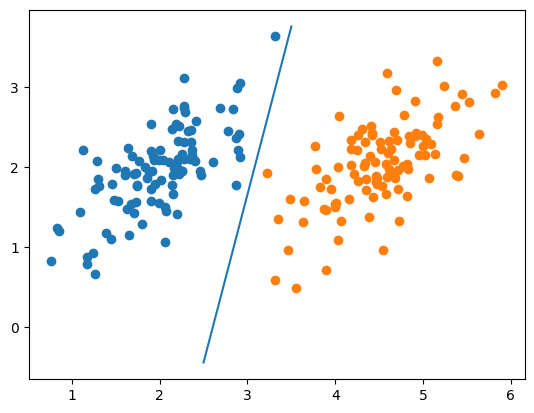

In [52]:
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
x1= [2.5, 3.5]
x2 = [-(b + w[0] * x1[0] )/w[1], -(b + w[0] * x1[1] )/w[1]]
plt.plot(x1, x2)

## 2. Soft Margin

Soft margin SVM là một biến thể của SVM cho phép một số điểm dữ liệu bị vi phạm margin để giảm thiểu sự phức tạp của mô hình và tăng tính tổng quát hóa. Có thể sử dụng cho các dữ liệu không linearly separable.

![](img/soft_margin.png)

### Bài toán gốc của soft margin SVM

Bài toán gốc của soft margin SVM có dạng:

$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
$$

subject to:

$$
y_i (\mathbf{w} \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i = 1, 2, \ldots, n.
$$

Trong đó $C$ phản ánh tâm quan trọng của $\xi$

### Xây dựng bài toán đối ngẫu

### Điều kiện Slater
Nhận thấy với mọi cặp $(\mathbf{w}, b)$ ta luôn chọn được 1 $\xi _i$ để:

$$
    y_i (\mathbf{w} \cdot x_i + b) \geq 1 - \xi_i
$$

$\Rightarrow$ định lý Slater thỏa mãn $\Rightarrow$ nghiệm của bài toán thỏa mã điều kiện KKT 

### Hàm Lagrangian
$$
L(\mathbf{w}, b, \xi, \lambda, \mu) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i - \sum_{i=1}^{n} \lambda_i \left[ y_i (\mathbf{w} \cdot x_i + b) - 1 + \xi_i \right] - \sum_{i=1}^{n} \mu_i \xi_i
$$

Trong đó:

$\lambda_i \geq 0$ là các nhân tử Lagrange tương ứng với ràng buộc $y_i (\mathbf{w} \cdot x_i + b) \geq 1 - \xi_i.$  

$\mu_i \geq 0$ là các nhân tử Lagrange tương ứng với ràng buộc $\xi_i \geq 0.$  

### Điều kiện KKT
**Điều kiện khả thi (Primal feasibility):**

$$
y_i (\mathbf{w} \cdot x_i + b) \geq 1 - \xi_i, \forall i
$$

$$
\xi_i \geq 0, \forall i
$$

**Điều kiện khả thi đối ngẫu (Dual feasibility):**

$$
\lambda_i \geq 0, \forall i
$$

$$
\mu_i \geq 0, \forall i
$$

**Điều kiện bù trừ bổ sung (Complementary slackness):**

$$
\lambda_i \left[ y_i (\mathbf{w} \cdot x_i + b) - 1 + \xi_i \right] = 0, \forall i
$$

$$
\mu_i \xi_i = 0, \forall i
$$

**Điều kiện stationarity:**

$$
\frac{\partial L}{\partial \mathbf{w}} = 0 \Rightarrow \mathbf{w} = \sum_{i=1}^{n} \lambda_i y_i x_i
$$

$$
\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^{n} \lambda_i y_i = 0
$$

$$
\frac{\partial L}{\partial \xi_i} = 0 \Rightarrow C - \lambda_i - \mu_i = 0, \forall i
$$

### Hàm đối ngẫu
$$
g(\mathbf{\lambda},\mathbf{\mu}) = \min_{\mathbf{w}, b, \xi}  L(\mathbf{w}, b, \xi, \lambda, \mu)
$$

Ta thu được 
$$
g(\mathbf{\lambda}, \mathbf{\mu}) = \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j (\mathbf{x}_i^T \cdot \mathbf{x}_j)
$$

Đặt $\mathbf{V} = [y_1 \mathbf{x}_1, \ldots, y_n \mathbf{x}_n]$, $\mathbf{K} = \mathbf{V}^T \mathbf{V}$  
Khi đó:
$$
g(\lambda) = \mathbf{1}^T \mathbf{\lambda} - \frac{1}{2} \mathbf{\lambda}^T \mathbf{K} \mathbf{\lambda}
$$

Ta có bài toán đối ngẫu:
$$
\mathbf{\lambda} = \arg \max_{\mathbf{\lambda}} g(\mathbf{\lambda})
$$

s.t.
$$
0 \le \lambda_i \le C
$$

$$
\sum_{i=1}^{n} \lambda_i y_i = 0
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .5]]

N = 100

X1 = np.random.multivariate_normal(mean=means[0], cov=cov, size=N)
X2 = np.random.multivariate_normal(mean=means[1], cov=cov, size=N)
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((np.ones(shape=(1, N)), np.full(shape=(1, N), fill_value=-1)), axis=1)

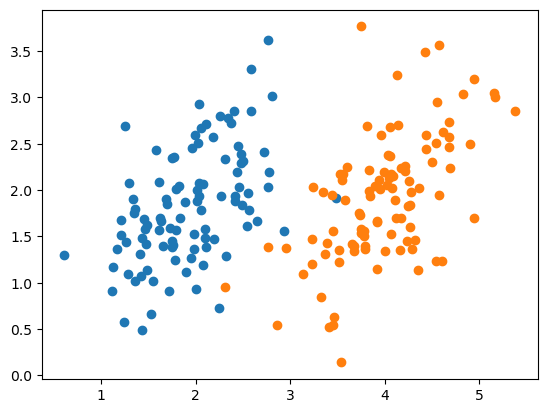

In [10]:
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])

In [11]:
from cvxopt import matrix, solvers


V = np.concatenate((X1.T, -X2.T), axis = 1)
K = matrix(V.T.dot(V))

q = matrix(-np.ones((2*N, 1)))
# Điều kiện 1 G.lambda =< h
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))
C = 100
h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))

# Điều kiện 2 
A = matrix(y)
b = matrix(np.zeros((1, 1))) 

solvers.options['show_progress'] = False
sol = solvers.qp(K, q, G, h, A, b)

lamda = np.array(sol['x'])


In [5]:
epsilon = 1e-6
S = np.where(lamda > epsilon)[0] # support set 
S2 = np.where(lamda < 0.999 * C)[0]

M = [val for val in S if val in S2]

VS = V[:, S]

XM = X[M, :]
yM = y[:,M]

lS = lamda[S]

w = VS.dot(lS)
b = np.mean(yM.T - w.T.dot(XM.T))

In [6]:
w

array([[-11.16819135],
       [  5.57795624]])

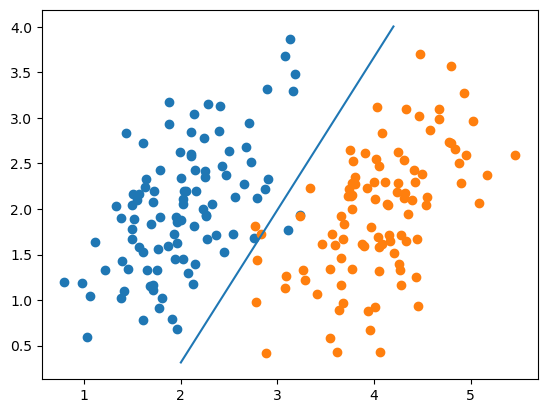

In [73]:
plt.scatter(X1[:,0], X1[:,1])
plt.scatter(X2[:,0], X2[:,1])
x1= [2, 4.2]
x2 = [-(b + w[0] * x1[0] )/w[1], -(b + w[0] * x1[1] )/w[1]]
plt.plot(x1, x2)

## 3. Kernel

## Nguyên lý hoạt động của Kernel SVM

Kernel SVM sử dụng một phép chiếu phi tuyến (non-linear mapping) để ánh xạ các điểm dữ liệu từ không gian ban đầu (original space) lên một không gian cao chiều hơn (higher-dimensional space), nơi mà các lớp có thể được phân tách tuyến tính bởi một siêu phẳng. 

## Hàm Kernel

Hàm kernel thường là một hàm số đo độ tương đồng (similarity) hoặc tích vô hướng (dot product) giữa hai điểm dữ liệu trong không gian đặc trưng. Một số hàm kernel phổ biến bao gồm:

1. **Linear kernel**: $$ K(x, x') = x^T x' $$
2. **Polynomial kernel**: $$ K(x, x') = (x^T x' + c)^d $$
3. **RBF (Radial Basis Function) kernel**: $$ K(x, x') = \exp(-\gamma \|x - x'\|^2) $$
4. **Sigmoid kernel**: $$ K(x, x') = \tanh(\alpha x^T x' + c) $$


khi đó
$$
g(\mathbf{\lambda}, \mathbf{\mu}) = \sum_{i=1}^{n} \lambda_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \lambda_i \lambda_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j)
$$

Ta có bài toán đối ngẫu:
$$
\mathbf{\lambda} = \arg \max_{\mathbf{\lambda}} g(\mathbf{\lambda})
$$

s.t.
$$
0 \le \lambda_i \le C
$$

$$
\sum_{i=1}^{n} \lambda_i y_i = 0
$$